In [1]:
from __future__ import print_function
import os
data_path = ['data']

In [2]:
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['wealth.csv'])
data = pd.read_csv(filepath,index_col=0,header=0)

X_real = np.linspace(0, 1.0, 10)

s = data[0:9]

t = s.transpose()
r = np.linspace(0,8 * 3,9).T

#Y_real = np.sin(2 * np.pi * X_real)

In [3]:
a = s.diff()
print(s,r)
print(a)

        0   10   20   30   40   50   60   70    80    90
year                                                    
1989 -0.2  0.0  0.3  0.9  1.9  3.2  5.0  7.8  13.6  67.5
1992 -0.3  0.1  0.4  1.1  2.0  3.3  5.2  7.8  12.9  67.5
1995 -0.3  0.1  0.5  1.1  2.1  3.3  4.9  7.4  12.4  68.5
1998 -0.3  0.1  0.4  1.0  1.9  3.1  4.7  7.4  12.5  69.3
2001 -0.2  0.1  0.3  0.9  1.7  2.7  4.4  7.2  12.7  70.2
2004 -0.2  0.1  0.3  0.8  1.6  2.7  4.3  7.2  13.2  70.0
2007 -0.2  0.1  0.3  0.8  1.6  2.7  4.3  6.7  11.7  72.1
2010 -0.7  0.0  0.2  0.5  1.1  2.1  3.6  6.1  12.1  75.0
2013 -0.7  0.0  0.2  0.5  1.1  2.0  3.6  6.0  11.7  75.7 [  0.   3.   6.   9.  12.  15.  18.  21.  24.]
        0   10   20   30   40   50   60   70   80   90
year                                                  
1989  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1992 -0.1  0.1  0.1  0.2  0.1  0.1  0.2  0.0 -0.7  0.0
1995  0.0  0.0  0.1  0.0  0.1  0.0 -0.3 -0.4 -0.5  1.0
1998  0.0  0.0 -0.1 -0.1 -0.2 -0.2 -0.2  0.0  0.1  

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

(0, 100)

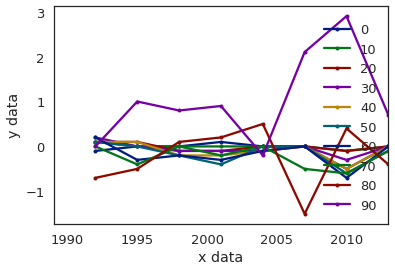

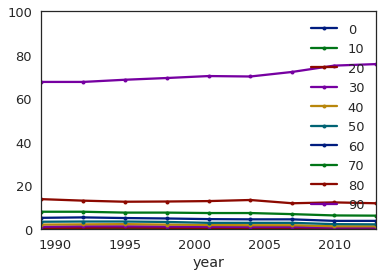

In [5]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

ax = a.plot(ls='-', marker='o', markersize='4', label='data')

ax.legend()
ax.set(xlabel='x data', ylabel='y data');

# Plot of the noisy (sparse)
bx = s.plot(ls='-', marker='o', markersize='4', label='data')
# bx = s.set_index('year')['y'].plot(ls='', marker='o', label='data')
# ax.plot(X_real, Y_real, ls='--', marker='', label='real function')
# bx.plot(ls='-',marker='x')
bx.set_ylim([0,100])
#ax.set_yscale('log')
# bx.legend()

 

In [6]:
P_data = s.iloc[:,:5].sum(1)
M_data = s.iloc[:,5:9].sum(1)
R_data = s.iloc[:,:9].sum(1)
print(P_data, M_data,R_data)

year
1989    2.9
1992    3.3
1995    3.5
1998    3.1
2001    2.8
2004    2.6
2007    2.6
2010    1.1
2013    1.1
dtype: float64 year
1989    29.6
1992    29.2
1995    28.0
1998    27.7
2001    27.0
2004    27.4
2007    25.4
2010    23.9
2013    23.3
dtype: float64 year
1989    32.5
1992    32.5
1995    31.5
1998    30.8
2001    29.8
2004    30.0
2007    28.0
2010    25.0
2013    24.4
dtype: float64


In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 3
pf = PolynomialFeatures(degree)
lr = LinearRegression(copy_X=True)

# Extract the X- and Y- data from the dataframe 
q = s.reset_index() # .reset_index()
Y_data = s[['90']]
X_tmp= q['year'].values.reshape(-1,1) #q['year']
X_data = X_tmp

f_data = np.array([[1989], [1992], [1995], [1998], [2001], [2004], [2007], [2010], [2013], [2016], [2019], [2021], [2024], [2027], [2030], [2033]])
f_poly = pf.fit_transform(f_data)

X_poly = pf.fit_transform(X_data)

lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(f_poly)

Plr = lr.fit(X_poly, P_data)
P_pred = Plr.predict(f_poly)

Rlr = lr.fit(X_poly, R_data)
R_pred = Plr.predict(f_poly)

#Mlr = lr.fit(X_poly, M_data)

#M_pred = Mlr.predict(f_poly)
fut = zip(f_data.flatten(),Y_pred.flatten())
print(list(fut))

fut = zip(f_data.flatten(),R_pred.flatten())
print(list(fut))
#print(lr.coef_)
#print(Y_pred)
#print(R_pred)

[(1989, 67.413939526304603), (1992, 67.827748763374984), (1995, 68.340600680559874), (1998, 68.99898596573621), (2001, 69.849395304918289), (2004, 70.93831938598305), (2007, 72.312248896807432), (2010, 74.017674524337053), (2013, 76.101086957380176), (2016, 78.608976882882416), (2019, 81.58783498685807), (2021, 83.858347742818296), (2024, 87.725465452298522), (2027, 92.187526508234441), (2030, 97.291021598502994), (2033, 103.08244140911847)]
[(1989, 32.574932082090527), (1992, 32.188414106611162), (1995, 31.688340585213155), (1998, 31.033274410292506), (2001, 30.181778470054269), (2004, 29.092415655497462), (2007, 27.723748856689781), (2010, 26.034340965095907), (2013, 23.982754869386554), (2016, 21.527553461957723), (2019, 18.627299630083144), (2021, 16.426082960795611), (2024, 12.691992626525462), (2027, 8.4023509095422924), (2030, 3.5157207008451223), (2033, -2.009335108101368)]


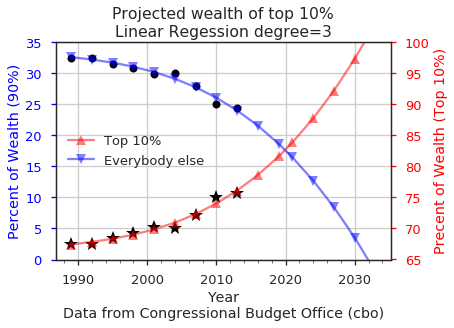

In [8]:
ax = plt.axes()
px = ax.twinx()

px.plot(X_data,Y_data, marker='*', markersize='15', ls='', c='k', alpha=1)
plbl = px.plot(f_data, Y_pred, marker='^', alpha=.5, c='r', label='Top 10%')
px.set_ylabel('Precent of Wealth (Top 10%)', color='r')
px.set_ylim(65,100)
px.tick_params(axis='y', labelcolor='r', length=5, color='r')

ax.plot(X_data,R_data, marker='o', markersize='8', ls='', c='k', alpha=1)
albl = ax.plot(f_data, R_pred, marker='v', alpha=.5, c='b', label='Everybody else')
ax.set_ylabel('Percent of Wealth (90%)', color='b')
ax.set_ylim(0,35)
ax.tick_params(axis='y', labelcolor='b', length=5, color='b')
ax.tick_params(axis='x', length=5)
ax.minorticks_on()
ax.tick_params(axis='x', length=3, which='minor' )
ax.set_xlabel('Year\nData from Congressional Budget Office (cbo)')
ax.grid(True)

lbl = plbl + albl
la = [i.get_label() for i in lbl]
plt.legend(lbl, la, loc=6)

# plt.text(1989,95,'Congressional Budget Office Data')
plt.title('Projected wealth of top 10%\nLinear Regession degree=3')

plt.savefig("top10wealth.svg")
# https://www.cbo.gov/publication/51846

In [ ]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# The ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# The plot of the predicted values
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
# plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(f_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_poly, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_poly, Y_pred_lr, label='lasso regression', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='year', ylabel='percent of wealth');

In [ ]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

In [ ]:
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-5e-4, 5e-4)
ax2.set_ylim(-4e-1, 4e-1)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));